In [15]:
# Keep it simple

from pathlib import Path
import os
import yaml
import pprint
import matplotlib.pyplot as plt
import numpy as np
from influence_moo.config import load_config
from influence_moo.waves import sample_waves
from influence_moo.plotting import plot_grid, plot_pts, plot_vectors

In [32]:
def radius_to_markersize(radius, ax):
    # Get the transformation from data coordinates to display coordinates
    fig = ax.figure
    # radius = 2*radius
    # Convert the radius in data units to display (pixel) coordinates
    radius_display = ax.transData.transform([(radius, 0), (0, 0)])
    # Convert the display distance (in pixels) to points
    radius_points = radius_display[0][0] - radius_display[1][0]
    # Matplotlib uses markersize in points^2, so we square the diameter
    markersize = np.sqrt(radius_points)
    return markersize

# def plot_env()

      env:connectivity grid:
        - [1, 1, 1, 1]
        - [1, 0, 0, 1]
        - [1, 0, 0, 1]
        - [1, 1, 1, 1]
        - [1, 0, 0, 1]
        - [1, 0, 0, 1]
        - [1, 1, 1, 1]
        - [1, 0, 0, 1]
        - [1, 0, 0, 1]
        - [1, 1, 1, 1]
        - [1, 0, 0, 1]
        - [1, 0, 0, 1]
        - [1, 1, 1, 1]
        - [1, 0, 0, 1]
        - [1, 0, 0, 1]
        - [1, 1, 1, 1]
      env:auvs:
        - path:
          - [0.5, 3.5]
          - [0.5, 0.5]
          - [3.5, 0.5]
        - path:
          - [6.5, 3.5]
          - [6.5, 0.5]
          - [9.5, 0.5]
          - [9.5, 3.5]
        - path:
          - [15.5, 0.5]
          - [15.5, 3.5]
          - [12.5, 3.5]
      env:asvs:
        - position: [3.5, 3.5]
        - position: [12.5, 0.5]
      env:pois:
        - position: [3.5, 0.5]
          observation_radius: 1.0
          value: 1.0
        - position: [0.5, 0.5]
          observation_radius: 1.0
          value: 1.0
        - position: [6.5, 3.5]
        

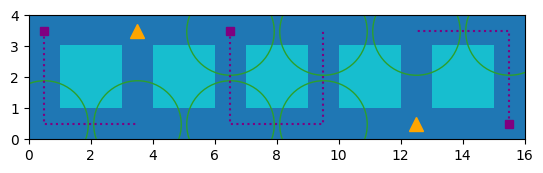

In [51]:
#charlie
cg = np.ones((16, 4))
cg[1:3, 1:3] = 0
cg[4:6, 1:3] = 0
cg[7:9, 1:3] = 0
cg[10:12, 1:3] = 0
cg[13:15, 1:3] = 0

# pois
pois = [
    {
        'position': [3.5, 0.5],
        'observation_radius': 1.0,
        'value': 1.0
    },
    {
        'position': [0.5, 0.5],
        'observation_radius': 1.0,
        'value': 1.0
    },
    {
        'position': [6.5, 3.5],
        'observation_radius': 1.0,
        'value': 1.0
    },
    {
        'position': [6.5, 0.5],
        'observation_radius': 1.0,
        'value': 1.0
    },
    {
        'position': [9.5, 0.5],
        'observation_radius': 1.0,
        'value': 1.0
    },
    {
        'position': [9.5, 3.5],
        'observation_radius': 1.0,
        'value': 1.0
    },
    {
        'position': [15.5, 3.5],
        'observation_radius': 1.0,
        'value': 1.0
    },
    {
        'position': [12.5, 3.5],
        'observation_radius': 1.0,
        'value': 1.0
    }
]

auvs = [
    {
        'path': [
            [0.5, 3.5],
            [0.5, 0.5],
            [3.5, 0.5]
        ],
    },
    {
        'path': [
            [6.5, 3.5],
            [6.5, 0.5],
            [9.5, 0.5],
            [9.5, 3.5]
        ]
    },
    {
        'path': [
            [15.5, 0.5],
            [15.5, 3.5],
            [12.5, 3.5]
        ]
    }
]

# asvs
asvs = [
    {
        'position': [3.5, 3.5]
    },
    {
        'position': [12.5, 0.5]
    }
]

fig, ax = plt.subplots(1,1)

for poi in pois:
    poi_markersize = 2*radius_to_markersize(radius=poi['observation_radius'], ax=ax)
    plot_pts(np.array([poi['position']]), ax, marker='o', markerfacecolor='none', markeredgecolor='tab:green', markersize=poi_markersize)

for auv in auvs:
    plot_pts(np.array([auv['path'][0]]), ax, 's', color='purple')
    plot_pts(np.array(auv['path']), ax, ':', color='purple')

for asv in asvs:
    plot_pts(np.array([asv['position']]), ax, '^', color='orange', markersize=10)

plot_grid(cg, ax, cmap='tab10_r')

print(3*'  '+'env:connectivity_grid:')
cglist = cg.astype(int).tolist()
for row in cglist:
    print(4*'  '+'- '+str(row))
print(3*'  '+'env:auvs:')
for auv in auvs:
    print(4*'  '+'- path:')
    for position in auv['path']:
        print(5*'  '+f'- [{position[0]}, {position[1]}]')
print(3*'  '+'env:asvs:')
for asv in asvs:
    p = asv['position']
    print(4*'  '+f'- position: [{p[0]}, {p[1]}]')
print(3*'  '+'env:pois:')
for poi in pois:
    p = poi['position']
    o = poi['observation_radius']
    v = poi['value']
    print(4*'  '+f'- position: [{p[0]}, {p[1]}]')
    print(5*'  '+f'observation_radius: {o}')
    print(5*'  '+f'value: {v}')

In [ ]:
# Delta